In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [7]:
# Load dataset
df = pd.read_csv("C:/Users/USER/Desktop/GMC/Checkpoints/DeepLearning_IMDB Dataset.csv")

In [9]:
# Text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    return text

# Apply cleaning
df['cleaned_review'] = df['review'].apply(clean_text)

# Convert labels to binary
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [11]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_review'])
y = df['sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
# Build the neural network model
model = Sequential([
    Dense(512, activation='relu', input_shape=(5000,)),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train.toarray(), y_train, epochs=10, batch_size=32, validation_data=(X_test.toarray(), y_test))

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 26s 20ms/step - accuracy: 0.8213 - loss: 0.3884 - val_accuracy: 0.8885 - val_loss: 0.2627
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.9142 - loss: 0.2166 - val_accuracy: 0.8884 - val_loss: 0.2678
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.9413 - loss: 0.1573 - val_accuracy: 0.8870 - val_loss: 0.3009
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.9742 - loss: 0.0785 - val_accuracy: 0.8841 - val_loss: 0.3690
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.9891 - loss: 0.0380 - val_accuracy: 0.8816 - val_loss: 0.5079
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.9926 - loss: 0.0222 - val_accuracy: 0.8800 - val_loss: 0.5345
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.9948 - loss: 0.0177 - val_accuracy: 0.8837 - val_loss: 0.5615
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 19ms/step - accuracy: 0.9945 -

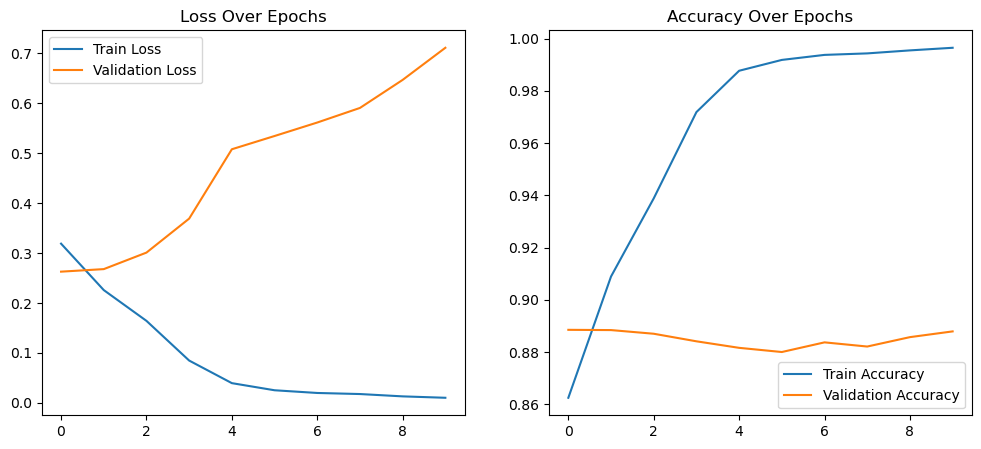

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8864 - loss: 0.7238
Test Loss: 0.7112, Test Accuracy: 0.8879


In [14]:
# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss Over Epochs")

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.show()

# Evaluate the model
eval_results = model.evaluate(X_test.toarray(), y_test)
print(f"Test Loss: {eval_results[0]:.4f}, Test Accuracy: {eval_results[1]:.4f}")